## Data visualization - (Insights are written below each graph)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed.csv", index_col=0)
df.head()


,movie_id,title,release_date,budget,revenue_worldwide,runtime,genres,imdb_id,franchise,cast_popularity_mean,...,imdb_votes,mpaa_rating,domestic_box_office,rotten_tomatoes_score,metacritic_score,awards_text,month,season,critics_score,audience_score
0,8193,Napoleon Dynamite,2004-06-11,-0.731466,46118097,95,['Comedy'],tt0374900,False,-0.884111,...,251071.0,PG,44540956.0,72.0,64.0,10 wins & 23 nominations total,6,Summer,6.80,0.70
1,663558,New Gods: Nezha Reborn,2021-02-06,-0.737418,70000000,117,"['Animation', 'Fantasy', 'Action']",tt13269670,True,-1.084437,...,4451.0,TV-14,NaN,80.0,NaN,3 wins & 3 nominations total,2,Winter,8.00,0.68
2,614409,To All the Boys: Always and Forever,2021-02-12,-0.737418,0,115,"['Romance', 'Comedy', 'Drama']",tt10676012,True,-0.136530,...,37385.0,TV-14,NaN,79.0,65.0,2 wins & 2 nominations total,2,Winter,7.20,0.63
3,12,Finding Nemo,2003-05-30,0.661406,940335536,100,"['Animation', 'Family']",tt0266543,True,-0.855845,...,1185437.0,G,380843261.0,99.0,90.0,Won 1 Oscar. 49 wins & 63 nominations total,5,Other,9.45,0.82
4,16,Dancer in the Dark,2000-09-01,-0.551404,40061153,140,"['Drama', 'Crime']",tt0168629,False,-0.662256,...,122419.0,R,4184036.0,69.0,63.0,Nominated for 1 Oscar. 34 wins & 48 nomination...,9,Other,6.60,0.79


## Question 1
### What factors most strongly predict box office success?
#### We’ll compare:

- Budget

- Cast popularity

- IMDb rating

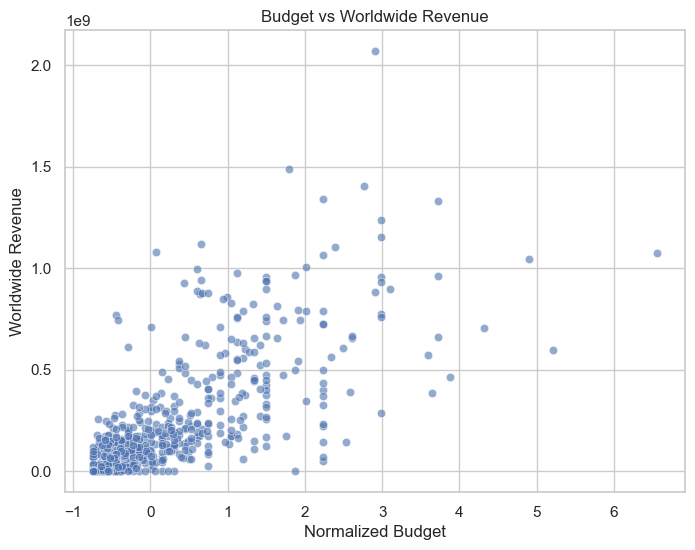

In [ ]:
# Budget vs Worldwide Revenue

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="budget",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Budget vs Worldwide Revenue")
plt.xlabel("Budget (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()


### Movies with higher budgets tend to generate higher revenue, but the wide spread indicates that budget alone does not guarantee box office success.

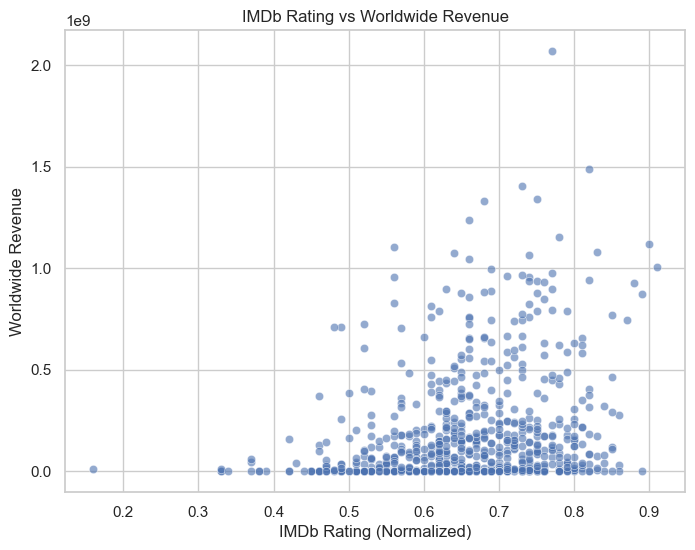

In [19]:
# IMDb Rating vs Worldwide Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="imdb_rating",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("IMDb Rating vs Worldwide Revenue")
plt.xlabel("IMDb Rating (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()

### Higher audience ratings are generally associated with better financial performance, although several highly rated movies still earn modest revenue.

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

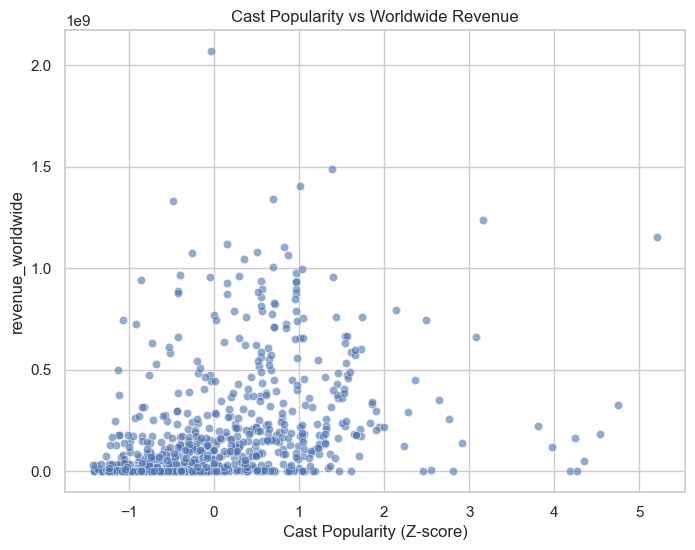

In [ ]:
# Cast Popularity vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="cast_popularity_mean",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Cast Popularity vs Worldwide Revenue")
plt.xlabel("Cast Popularity (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.yscale("log")
plt.show()


### Cast popularity shows a positive but weaker relationship with revenue compared to budget.

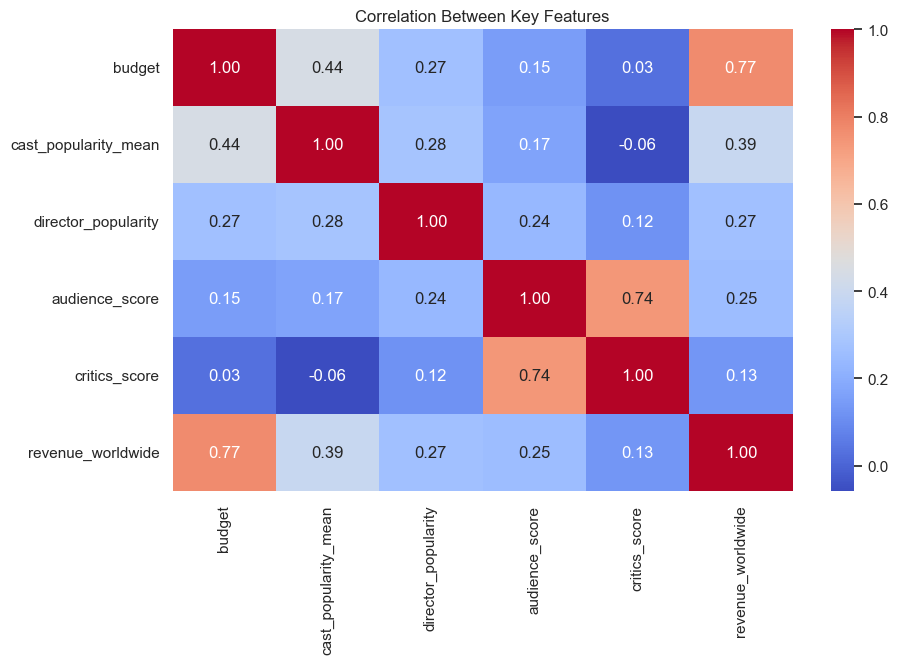

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,6))

corr = df[[
    "budget",
    "cast_popularity_mean",
    "director_popularity",
    "audience_score",
    "critics_score",
    "revenue_worldwide"
]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Between Key Features")
plt.show()

### Budget has the strongest correlation with revenue, followed by audience ratings, while cast and director popularity have weaker effects.

## Question 2
### Do summer movies perform better than winter movies?

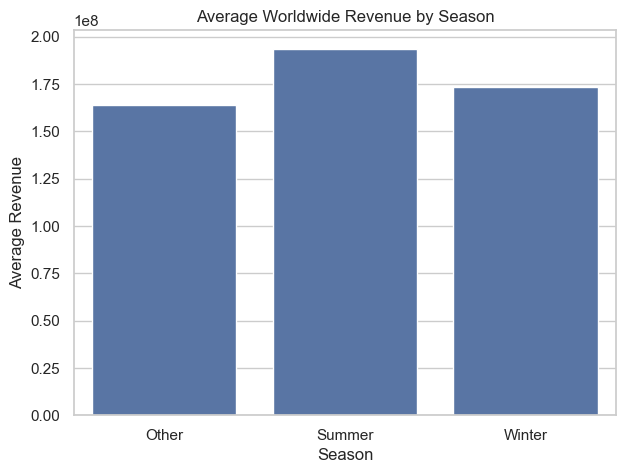

In [9]:
# Average Revenue by Season
season_revenue = df.groupby("season")["revenue_worldwide"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=season_revenue,
    x="season",
    y="revenue_worldwide"
)

plt.title("Average Worldwide Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Average Revenue")
plt.show()

### Movies released in summer tend to earn higher average revenue compared to winter and other seasons.

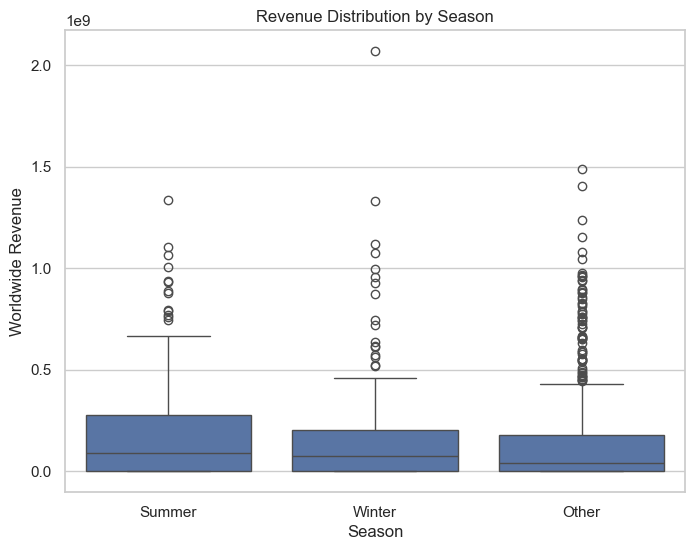

In [10]:
# Revenue Distribution by Season (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="season",
    y="revenue_worldwide"
)

plt.title("Revenue Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Worldwide Revenue")
plt.show()

### Summer releases show higher medians and more extreme high-end outliers, reflecting blockbuster releases.

## Question 3
### Difference between critics’ and audience ratings

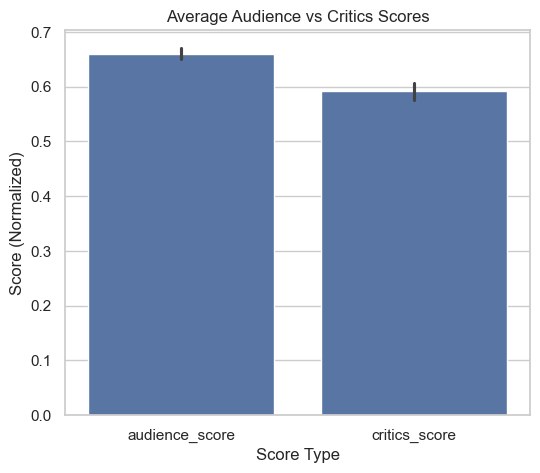

In [23]:
# Critics vs Audience Scores (Overall)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["audience_score", "critics_score"]] = scaler.fit_transform(
    df[["audience_score", "critics_score"]]
)

avg_scores = df.melt(
    value_vars=["audience_score", "critics_score"],
    var_name="Score Type",
    value_name="Score"
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=avg_scores,
    x="Score Type",
    y="Score"
)

plt.title("Average Audience vs Critics Scores")
plt.ylabel("Score (Normalized)")
plt.show()


### Critics tend to rate movies slightly lower on average compared to audiences.

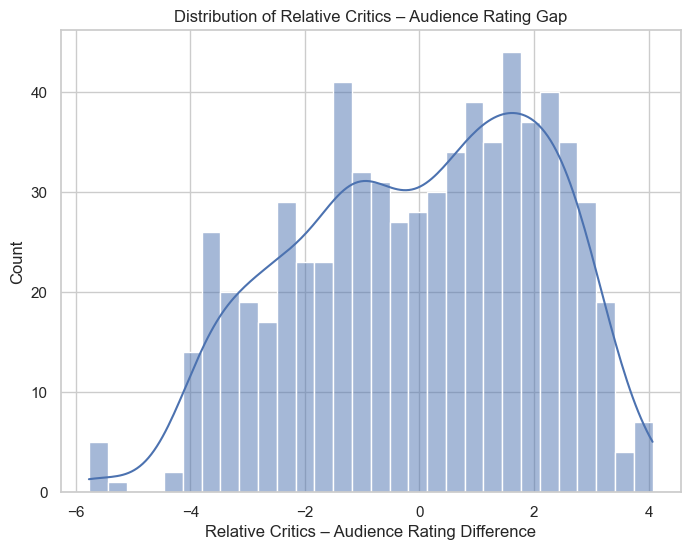

In [22]:
# Rating Gap Distribution
df["rating_gap"] = (
    (df["critics_score"] - df["critics_score"].mean()) -
    (df["audience_score"] - df["audience_score"].mean())
)


plt.figure(figsize=(8,6))
sns.histplot(df["rating_gap"], bins=30, kde=True)

plt.title("Distribution of Relative Critics – Audience Rating Gap")
plt.xlabel("Relative Critics – Audience Rating Difference")
plt.show()

### Most movies cluster around a small rating gap, but some titles are significantly more appreciated by audiences than critics.

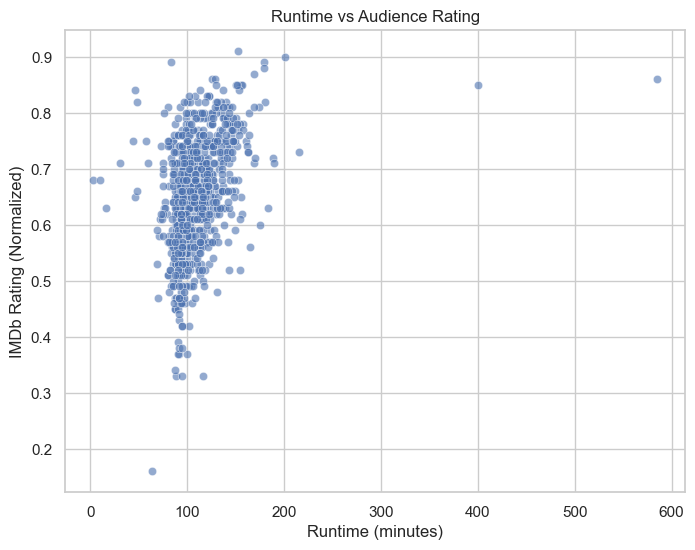

In [ ]:
# Runtime vs Audience Rating
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="runtime",
    y="audience_score",
    alpha=0.6
)

plt.title("Runtime vs Audience Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Audience Rating (Normalized)")
plt.show()

### Extremely long or short movies tend to receive slightly lower audience ratings.